# NETFLIX RECOMMENDATION SYSTEM

## Step 1: Data Loading and Preprocessing

1. Load the Netflix dataset from a CSV file using pd.read_csv.
2. Handle missing values:
    - Fill missing values in listed_in and cast columns with empty strings.
    - Fill missing values in release_year with 0 and convert to integer.
    - Fill missing values in country with 'Unknown'.
    - Fill missing values in duration with 'Unknown'.
    - Fill missing values in title and description with empty strings.
3. Combine relevant columns (listed_in and cast) into a new column content for content-based filtering.


In [1]:
!pip install wordcloud


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from wordcloud import WordCloud


In [3]:
# Load the dataset
netflix_data = pd.read_csv("C:\\Users\\vaish\\Downloads\\archive\\netflix_data.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Fill missing values for required columns
netflix_data['listed_in'] = netflix_data['listed_in'].fillna('')
netflix_data['cast'] = netflix_data['cast'].fillna('')
netflix_data['release_year'] = netflix_data['release_year'].fillna(0).astype(int)
netflix_data['country'] = netflix_data['country'].fillna('Unknown')
netflix_data['duration'] = netflix_data['duration'].fillna('Unknown')
netflix_data['title'] = netflix_data['title'].fillna('')
netflix_data['description'] = netflix_data['description'].fillna('')


In [7]:
# Combine relevant columns for content-based filtering (genres and cast)
netflix_data['content'] = netflix_data['listed_in'] + ' ' + netflix_data['cast']

## Step 2: Data Visualization

> 1. Visualize distribution of movies by genre:
    - Split listed_in column into individual genres.
    - Count occurrences of each genre.
    - Plot a bar chart using Seaborn.
    
    
> 2. Visualize most frequent cast members:
    - Split cast column into individual cast members.
    - Count occurrences of each cast member.
    - Plot a bar chart using Seaborn.
    
    
> 3. Visualize number of movies released each year:
    - Count occurrences of each release year.
    - Plot a bar chart using Seaborn.
    
> 4. Visualize distribution of types (movies vs TV shows):
    - Count occurrences of each type.
    - Plot a pie chart using Matplotlib.
    
    
> 5. Visualize top countries with highest number of movies:
    - Count occurrences of each country.
    - Plot a bar chart using Seaborn.
    
    
    
> 6. Visualize movie duration distribution:
    - Extract numeric duration from duration column.
    - Plot a histogram using Seaborn.
    
    
> 7. Visualize most common words in Netflix titles and descriptions:
    - Use WordCloud to generate word clouds.
    - WordCloud: Using this for both titles and descriptions is a good call, as it will reveal important keywords influencing content-based recommendations.


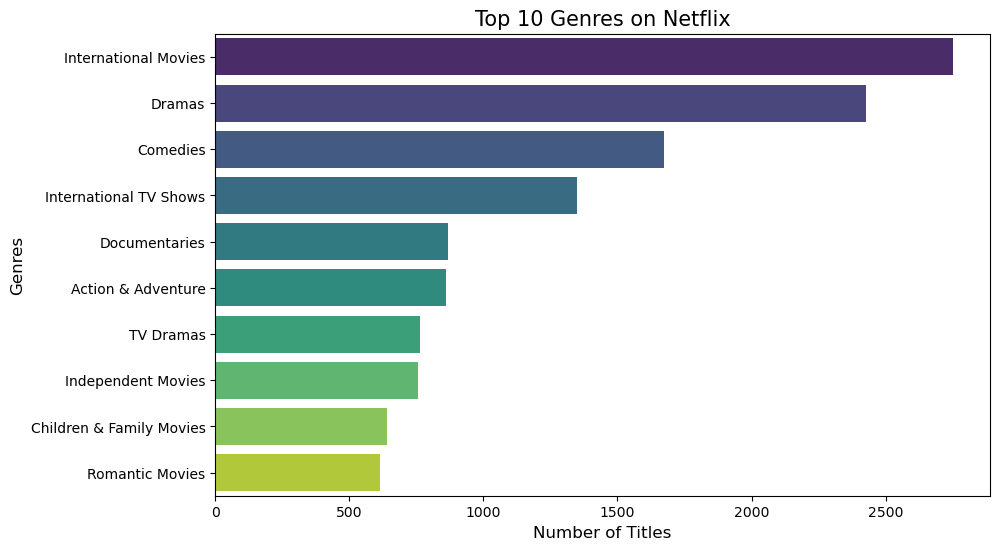

In [8]:
# Visualization: Distribution of movies by genre
plt.figure(figsize=(10, 6))
genre_data = netflix_data['listed_in'].str.split(', ', expand=True).stack().value_counts()
sns.barplot(y=genre_data.index[:10], x=genre_data.values[:10], palette="viridis")
plt.title('Top 10 Genres on Netflix', fontsize=15)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.show()

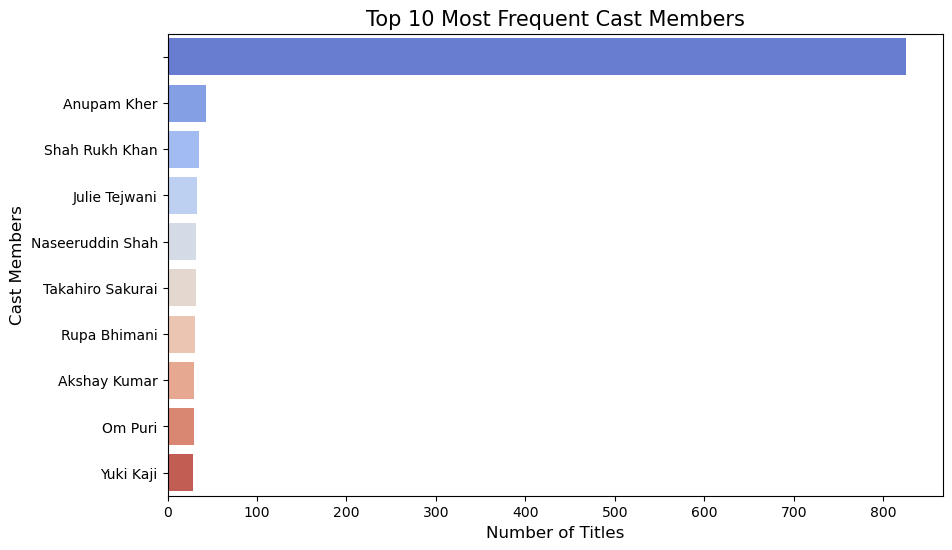

In [9]:

# Visualization: Most frequent cast members
plt.figure(figsize=(10, 6))
cast_data = netflix_data['cast'].str.split(', ', expand=True).stack().value_counts()
sns.barplot(y=cast_data.index[:10], x=cast_data.values[:10], palette="coolwarm")
plt.title('Top 10 Most Frequent Cast Members', fontsize=15)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Cast Members', fontsize=12)
plt.show()

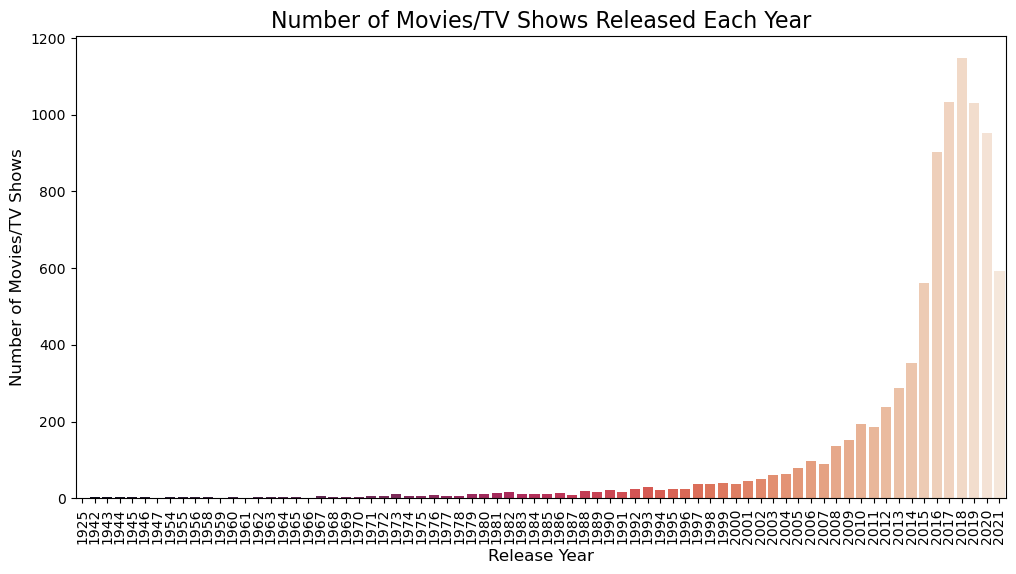

In [10]:
#  Number of Movies Released Each Year
plt.figure(figsize=(12, 6))
yearly_release_count = netflix_data['release_year'].value_counts().sort_index()
sns.barplot(x=yearly_release_count.index, y=yearly_release_count.values, palette="rocket")
plt.title('Number of Movies/TV Shows Released Each Year', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies/TV Shows', fontsize=12)
plt.xticks(rotation=90)
plt.show()


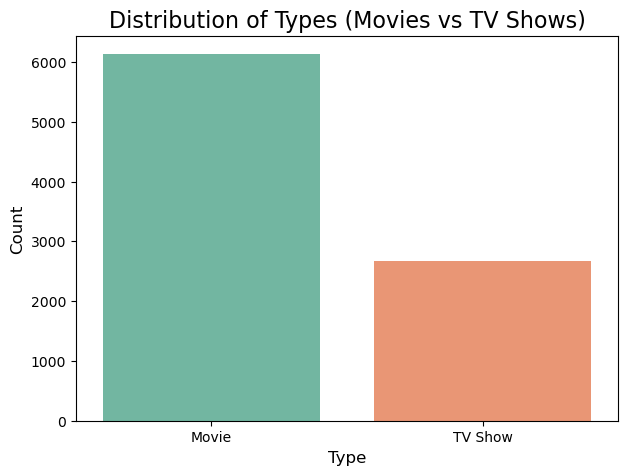

In [11]:
#  Distribution of Types (Movies vs TV Shows)
plt.figure(figsize=(7, 5))
type_count = netflix_data['type'].value_counts()
sns.barplot(x=type_count.index, y=type_count.values, palette="Set2")
plt.title('Distribution of Types (Movies vs TV Shows)', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


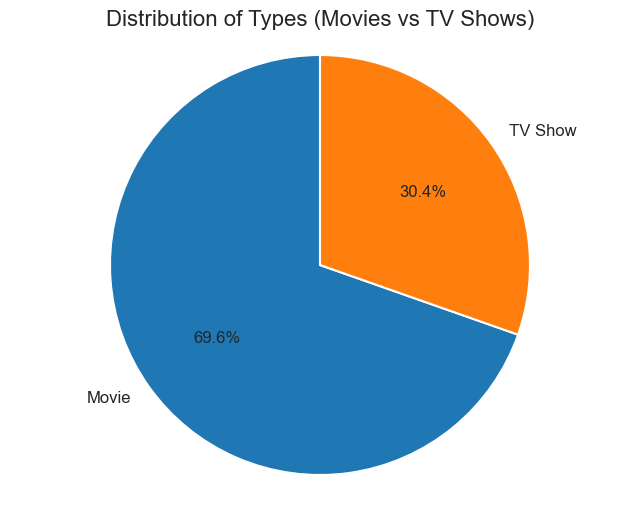

In [12]:
# Distribution of Types (Movies vs TV Shows)
plt.figure(figsize=(8, 6))
type_count = netflix_data['type'].value_counts()
sns.set_style("whitegrid")
sns.set_context("talk")
plt.pie(type_count.values, labels=type_count.index, autopct='%1.1f%%', 
        startangle=90, textprops={'fontsize': 12})
plt.title('Distribution of Types (Movies vs TV Shows)', fontsize=16)
plt.axis('equal')  
plt.show()


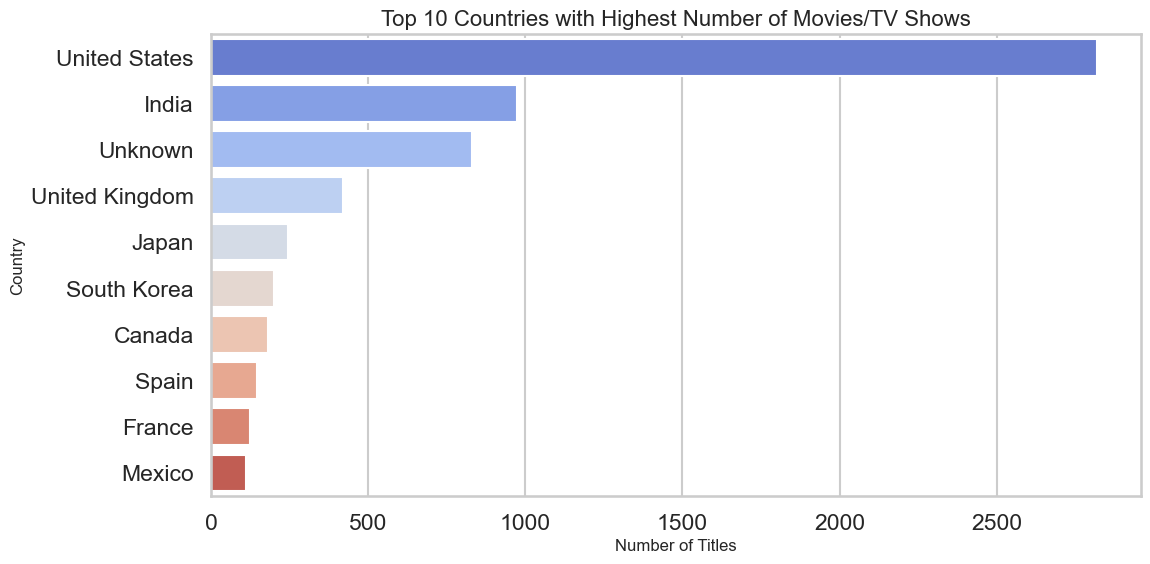

In [13]:
#  Top Countries with the Highest Number of Movies
plt.figure(figsize=(12, 6))
top_countries = netflix_data['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="coolwarm")
plt.title('Top 10 Countries with Highest Number of Movies/TV Shows', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()


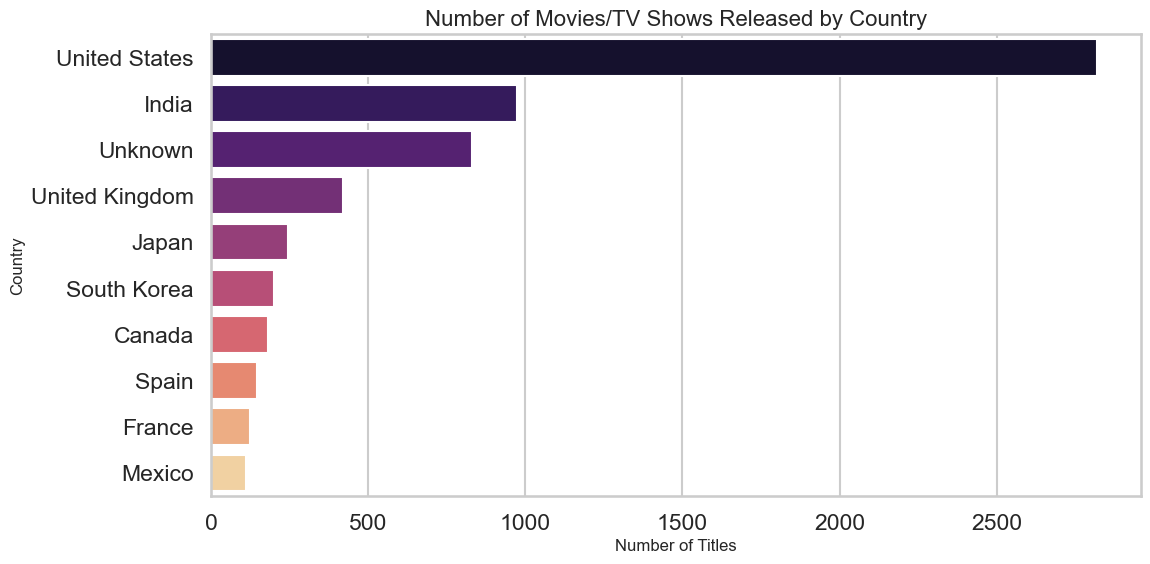

In [14]:
#  Number of Movies Released by Country
plt.figure(figsize=(12, 6))
country_release_count = netflix_data['country'].value_counts().sort_values(ascending=False)
sns.barplot(y=country_release_count.index[:10], x=country_release_count.values[:10], palette="magma")
plt.title('Number of Movies/TV Shows Released by Country', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()



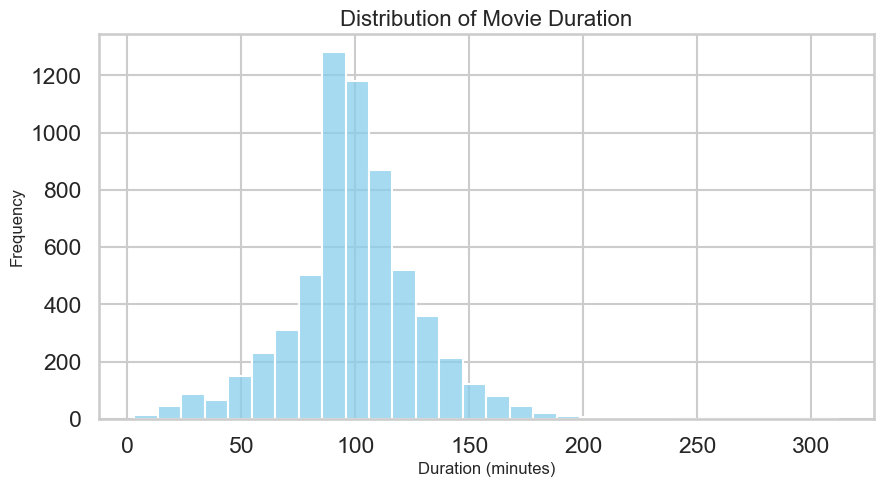

In [15]:
# Movie Duration Distribution
# Extract the numeric part of duration for Movies
netflix_data['numeric_duration'] = netflix_data['duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(10, 5))
sns.histplot(netflix_data[netflix_data['type'] == 'Movie']['numeric_duration'], bins=30, color='skyblue')
plt.title('Distribution of Movie Duration', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


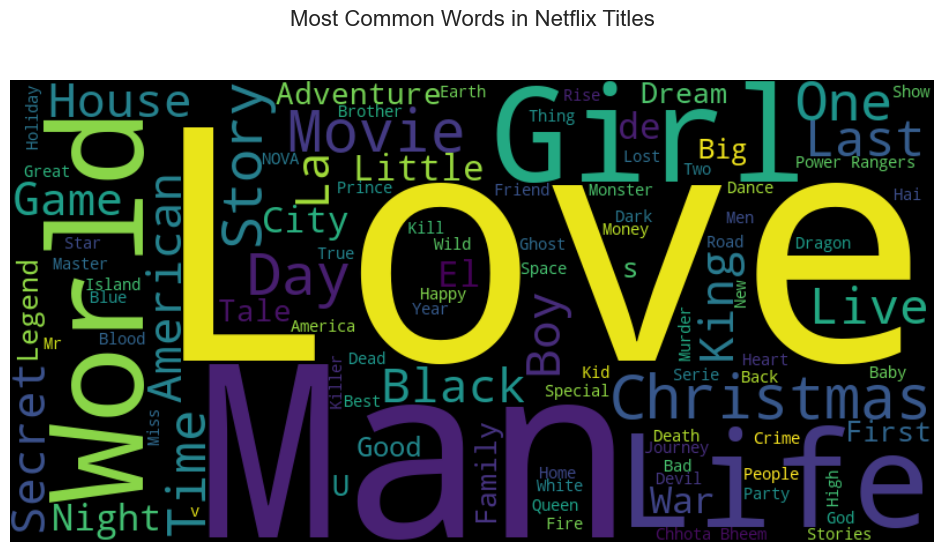

In [16]:
#  Most Common Words in Netflix Titles
plt.figure(figsize=(12, 6))
all_titles = ' '.join(netflix_data['title'])
title_wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(all_titles)
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles\n\n', fontsize=16)
plt.show()


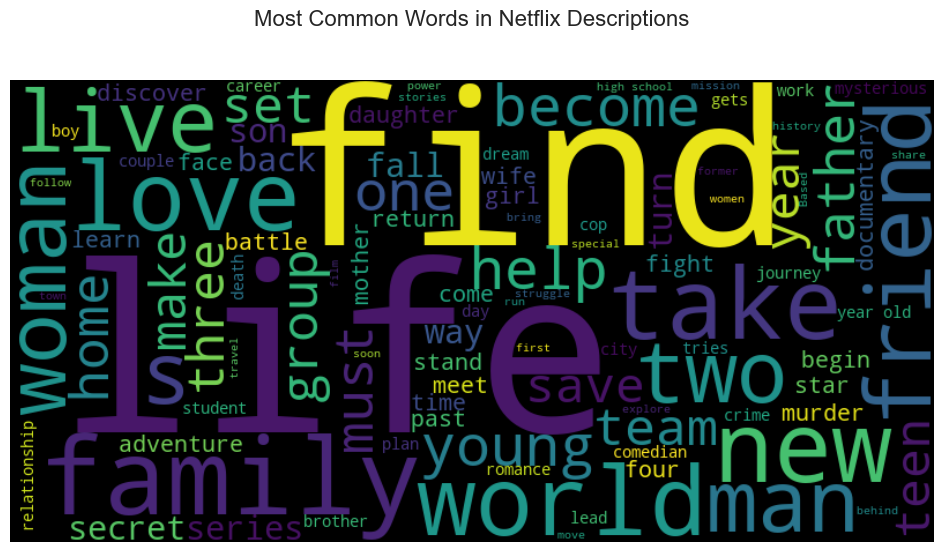

In [17]:
# Most Common Words in Netflix Descriptions
plt.figure(figsize=(12, 6))
all_descriptions = ' '.join(netflix_data['description'])
description_wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=100).generate(all_descriptions)
plt.imshow(description_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions\n\n', fontsize=16)
plt.show()


## Step 3: Content-Based Recommendation System

1. Create a TF-IDF vectorizer object using TfidfVectorizer.
   
2. Transform content column into feature vectors using fit_transform.
3. Compute cosine similarity between movies based on TF-IDF vectors using cosine_similarity.
4. Define a function get_recommendations to retrieve top 10 movie recommendations based on cosine similarity.



In [18]:
# Create a TF-IDF Vectorizer to transform text into feature vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['content'])

In [19]:
# Compute cosine similarity between movies based on TF-IDF vectors
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [20]:
# Function to get recommendations based on cosine similarity
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = netflix_data[netflix_data['title'].str.lower() == title.lower()].index[0]
    
    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Visualize similarity scores
    plt.figure(figsize=(10, 6))
    movie_titles = netflix_data['title'].iloc[movie_indices].values
    similarity_scores = [i[1] for i in sim_scores]
    sns.barplot(x=similarity_scores, y=movie_titles, palette="Reds_d")
    plt.title(f'Similarity Scores for Movies Similar to "{title}"', fontsize=15)
    plt.xlabel('Similarity Score', fontsize=12)
    plt.ylabel('Movie Titles', fontsize=12)
    plt.show()
    
    # Return the top 10 most similar movies
    return netflix_data['title'].iloc[movie_indices]


## Step 4: Testing the Recommendation System

1. Test the recommendation system with example movie titles (e.g., 'Kota Factory', 'A Lion in the House', 'Chappie').
2. Visualize similarity scores for movies similar to the input title.



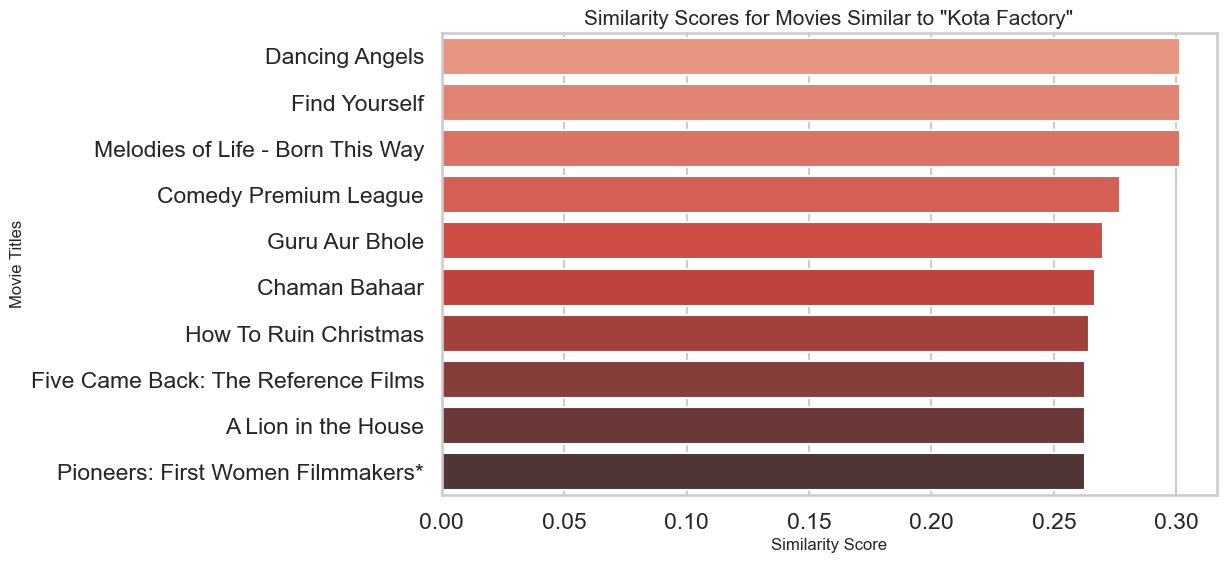

1038                         Dancing Angels
2982                          Find Yourself
7438       Melodies of Life - Born This Way
242                   Comedy Premium League
751                          Guru Aur Bhole
2353                          Chaman Bahaar
1535                  How To Ruin Christmas
1331    Five Came Back: The Reference Films
1721                    A Lion in the House
4250      Pioneers: First Women Filmmakers*
Name: title, dtype: object


In [21]:
# Test the recommendation system
recommendations = get_recommendations('Kota Factory')
print(recommendations)

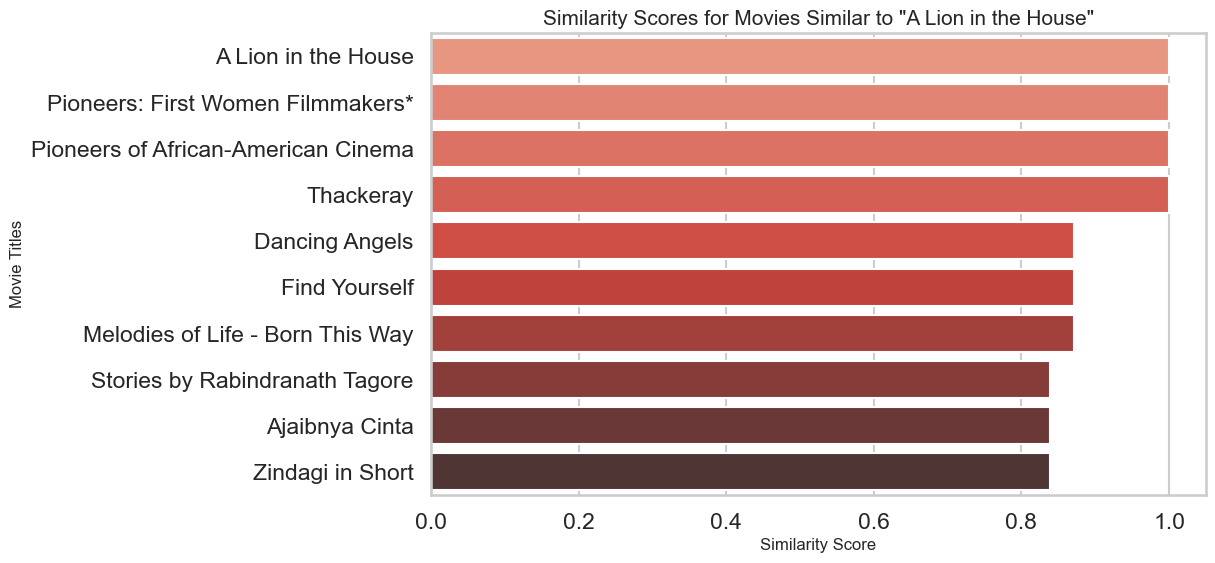

1721                    A Lion in the House
4250      Pioneers: First Women Filmmakers*
7743    Pioneers of African-American Cinema
8173                              Thackeray
1038                         Dancing Angels
2982                          Find Yourself
7438       Melodies of Life - Born This Way
69           Stories by Rabindranath Tagore
1056                         Ajaibnya Cinta
1282                       Zindagi in Short
Name: title, dtype: object


In [22]:
recommendations = get_recommendations('A Lion in the House')
print(recommendations)

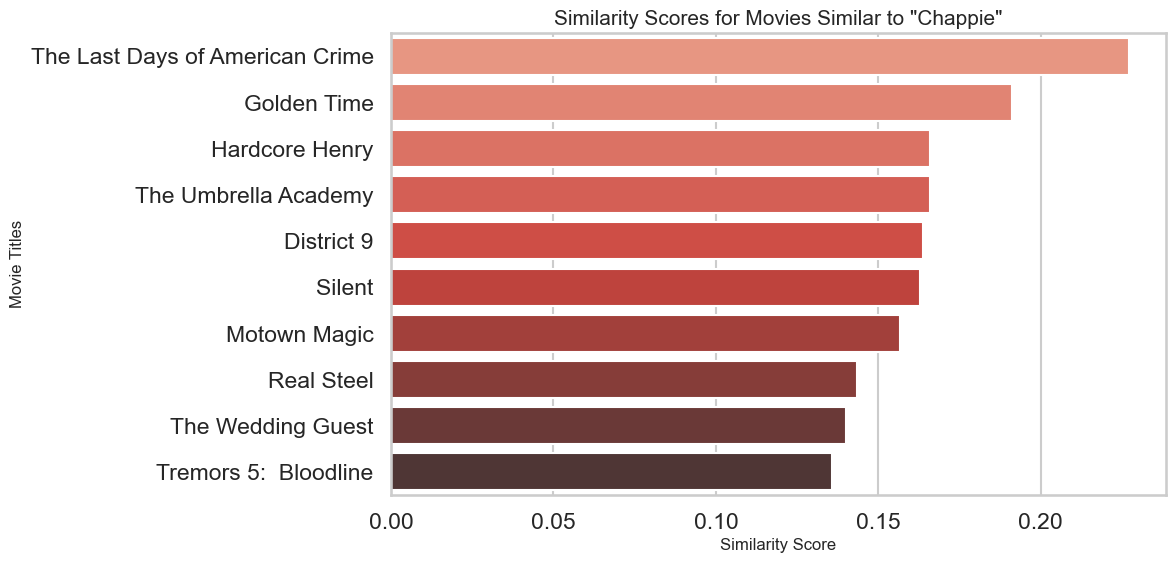

2424    The Last Days of American Crime
6865                        Golden Time
6925                     Hardcore Henry
2190               The Umbrella Academy
6617                         District 9
3777                             Silent
3707                       Motown Magic
1957                         Real Steel
821                   The Wedding Guest
8625              Tremors 5:  Bloodline
Name: title, dtype: object


In [23]:
recommendations = get_recommendations('Chappie')
print(recommendations)